<a href="https://colab.research.google.com/github/srihariharan2009/ml/blob/master/SNOWTicketClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.models import model_from_json
import numpy
import os

In [0]:
data = pd.read_csv('RIN_Data.csv')

data['Type'].value_counts()

train_size = int(len(data) * .8)

train_desc = (data['Description'])[:train_size]
train_type = (data['Type'])[:train_size]

test_desc = (data['Description'])[train_size:]
test_type = (data['Type'])[train_size:]

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

tokenize.fit_on_texts(train_desc)  # only fit on train
x_train = tokenize.texts_to_matrix(train_desc)
x_test = tokenize.texts_to_matrix(test_desc)

In [0]:
encoder = LabelEncoder()
encoder.fit(train_type)
y_train = encoder.transform(train_type)
y_test = encoder.transform(test_type)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [6]:
batch_size = 32
epochs = 2

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split=0.1,
)

Instructions for updating:
Use tf.cast instead.
Train on 1592 samples, validate on 177 samples
Epoch 1/2
1592/1592 [==============================] - 1s 823us/step - loss: 0.4010 - acc: 0.8109 - val_loss: 0.2555 - val_acc: 0.9153
Epoch 2/2
1592/1592 [==============================] - 1s 354us/step - loss: 0.1891 - acc: 0.9315 - val_loss: 0.1921 - val_acc: 0.9209


In [8]:
score = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=1)
print(score)

443/443 [==============================] - 0s 98us/step
[0.29731108887335517, 0.8690744938484433]


In [10]:
prediction=text_labels[np.argmax(my_prediction)]
print(prediction)

incident


In [13]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [22]:
Description=input("Please enter the Description: ")
vect = tokenize.texts_to_matrix([Description])
my_prediction = loaded_model.predict(np.array(vect))
text_labels = encoder.classes_
prediction=text_labels[np.argmax(my_prediction)]
print(prediction)


Please enter the Description: something is broken
incident


In [17]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 95.99%


In [25]:
Description=input("Please enter the Description: ")
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

tokenize.fit_on_texts([Description])
print(tokenize.word_index)

Please enter the Description: SAP Access
{'sap': 1, 'access': 2}


In [26]:
Def getTokenisedWord(seedWord):
  _token = word2index[seedWord.toLowerCase()]
  return tf.tensor1d([_token])
seedWordToken = getTokenisedWord('Access');
print(seedWordToken)

SyntaxError: ignored

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0505 14:00:14.744195 140536508974976 saver.py:1483] Saver not created because there are no variables in the graph to restore


[[0.99999976 0.4962282  0.13574758 0.24164277 0.29750648 0.22691879]
 [0.4962282  1.         0.09357404 0.10283309 0.2068705  0.15031925]
 [0.13574758 0.09357404 1.0000001  0.3834802  0.1632871  0.21761811]
 [0.24164277 0.10283309 0.3834802  1.         0.08307709 0.16043612]
 [0.29750648 0.2068705  0.1632871  0.08307709 1.0000002  0.5633584 ]
 [0.22691879 0.15031925 0.21761811 0.16043612 0.5633584  0.9999999 ]]


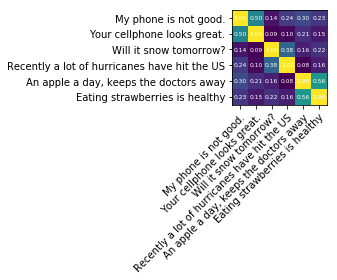

In [32]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

module_url = "https://tfhub.dev/google/universal-sentence-encoder/1?tf-hub-format=compressed"

def heatmap(x_labels, y_labels, values):
    fig, ax = plt.subplots()
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, "%.2f"%values[i, j],
                           ha="center", va="center", color="w", 
fontsize=6)

    fig.tight_layout()
    plt.show()
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# sample text
messages = [
# Smartphones
"My phone is not good.",
"Your cellphone looks great.",

# Weather
"Will it snow tomorrow?",
"Recently a lot of hurricanes have hit the US",

# Food and health
"An apple a day, keeps the doctors away",
"Eating strawberries is healthy",
]

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})

    corr = np.inner(message_embeddings_, message_embeddings_)
    print(corr)
    heatmap(messages, messages, corr)


In [0]:
# load Flask 
import flask
app = flask.Flask(__name__)
# define a predict function as an endpoint 
@app.route("/predict", methods=["GET","POST"])
def predict():
    data = {"success": False}
    # get the request parameters
    params = flask.request.json
    if (params == None):
        params = flask.request.args
    # if parameters are found, echo the msg parameter 
    if (params != None):
        data["response"] = params.get("msg")
        data["success"] = True
    # return a response in json format 
    return flask.jsonify(data)
# start the flask app, allow remote connections
app.run(host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


In [3]:
#Function so that one session can be called multiple times. 
#Useful while multiple calls need to be done for embedding. 
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [-0.016987275332212448, -0.008949830196797848, -0.007062743883579969, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.035313352942466736, -0.025384247303009033, -0.007880019024014473, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.018790949136018753, 0.045365139842033386, -0.020010894164443016, ...]



In [5]:
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_hub as hub



module_url = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embed = hub.KerasLayer(module_url)
embeddings = embed(["A long sentence.", "single-word","http://example.com"])
print(embeddings.shape)  #(3,128)

ValueError: ignored